<a href="https://colab.research.google.com/github/sumperor/currency_basket_wallet/blob/main/A1_All_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: Assignment One - Group Two
format: pdf
---

\begin{center}
\textbf{Application of R For Finance}
\end{center}

\vspace{2cm}
\begin{center}
\textbf{Authors:}\\
\text{}\\
\text{Aghulan Sivakaran, Alvaro Camacho, Yujiang Luo,}\\
\text{Sumedh Garimella, Yunjie Wu}
\end{center}

\vspace{5cm}

\begin{center}
\textbf{Date: 3 October 2025}
\end{center}



\newpage
\tableofcontents
\listoffigures
\listoftables
\newpage

## Initialisation

In [3]:
# Loading the Libraries

library(dplyr)
library(lubridate)
library(ggplot2)


# Loading the Assignment Data File
All_data <- read.csv('compustat_food_bev.csv')

# Converting the dates
All_data$datadate <- as.Date(All_data$datadate, format = "%d/%m/%Y")

# Converting the column names for easier readability
All_data <- All_data %>%
  rename(
    close_price       = prccd,
    high        = prchd,
    low         = prcld,
    volume      = cshtrd,
    open_price        = prcod
  )

# Pulling the data for each stock
DPZ_data <- filter(All_data, tic == "DPZ")
sbux_data <- filter(All_data, tic == "SBUX")
pbpb <- filter(All_data, tic == "PBPB")
WEN_data <- filter(All_data, tic == "WEN")
cmg_data <- filter(All_data, tic =="CMG")



## All Stock Features and Metrics

### SBUX

In [ ]:

sbux_data <- sbux_data %>%
  mutate(
    daily_return = (close_price - lag(close_price)) / lag(close_price),
    momentum_10d = close_price - lag(close_price, 10),
    daily_range  = high - low,
    mfv = ifelse(
      high != low,
      (((close_price - low) - (high - close_price)) / (high - low)) * volume,
      NA_real_
    ),
    month = month(datadate),
    year  = year(datadate),

    max_high_val   = max(high, na.rm = TRUE),
    max_return_val = max(daily_return, na.rm = TRUE),

    is_max_high    = high == max_high_val,
    is_max_return  = daily_return == max_return_val
  ) %>%
  filter(!is.na(daily_return))

total_vol_june2023 <- sbux_data %>%
  filter(year == 2023, month == 6) %>%
  summarise(total_volume = sum(volume, na.rm = TRUE)) %>%
  pull(total_volume)

mean_daily_return <- mean(sbux_data$daily_return, na.rm = TRUE)

q9 <- sbux_data %>%
  filter(is_max_high) %>%
  transmute(date = format(datadate, "%Y-%m-%d"), high)

q10 <- sbux_data %>%
  filter(is_max_return) %>%
  transmute(date = format(datadate, "%Y-%m-%d"), daily_return)

cat(paste("Q7: Total trading volume in June 2023 for SBUX =", total_vol_june2023, "\n"))
cat(paste("Q8: Mean daily return for SBUX =", round(mean_daily_return, 6), "\n"))

cat("Q9: Date(s) with largest high price for SBUX:\n")
print(q9)

cat("Q10: Date(s) with largest daily return for SBUX:\n")
print(q10)

Q7: Total trading volume in June 2023 for SBUX = 151045270 
Q8: Mean daily return for SBUX = 0.000291 
Q9: Date(s) with largest high price for SBUX:
        date   high
1 2021-07-23 126.32
Q10: Date(s) with largest daily return for SBUX:
        date daily_return
1 2022-05-04   0.09834522


### DPZ

In [ ]:
# Calculating and adding the daily return column

DPZ_data <- mutate(DPZ_data, Daily_Return = (close_price - lag(close_price)) / lag(close_price))

# Calculating and adding the volume change

DPZ_data <- mutate(DPZ_data, Volume_Change = volume - lag(volume))

# Calculating and adding the close-open change

DPZ_data <- mutate(DPZ_data, Intraday = close_price - open_price)

# Calculating and adding money flow volume indicator (MFV)

DPZ_data <- mutate(DPZ_data, MFV = ((close_price-low)-(high-close_price))/(high-low)*volume)

#Column that indicates the month and year
DPZ_data <- mutate(DPZ_data, Month = month(DPZ_data$datadate), .before = tic)
DPZ_data <- mutate(DPZ_data, Year = year(DPZ_data$datadate), .before = Month)

# The Total Trading Volume in June 2023
Total_Vol = sum(DPZ_data$volume, na.rm = TRUE)

# The Mean Daily Return Over the Entire Period
Mean_Daily_Return = mean(DPZ_data$Daily_Return, na.rm = TRUE)

cat(paste("Q7: Total trading volume in June 2023 for DPZ =", Total_Vol, "\n"))
cat(paste("Q8: Mean daily return for DPZ =", round(Mean_Daily_Return, 6), "\n"))

cat("Q9: Date with largest high price for DPZ:")
# Largest Positive High Price
Largest_Price = max(DPZ_data$high, na.rm = TRUE)
DPZ_data$datadate[DPZ_data$high == Largest_Price & !is.na(DPZ_data$high)]


cat("Q10: Date with largest daily return for DPZ:")
# Largest Daily Return
Largest_Daily_Return = max(DPZ_data$Daily_Return, na.rm = TRUE)
DPZ_data$datadate[DPZ_data$Daily_Return == Largest_Daily_Return & !is.na(DPZ_data$Daily_Return)]

Q7: Total trading volume in June 2023 for DPZ = 459184356 
Q8: Mean daily return for DPZ = 0.000131 
Q9: Date with largest high price for DPZ:

[1] "2021-12-31"

Q10: Date with largest daily return for DPZ:

[1] "2021-07-22"

### WEN

In [ ]:
#Step 2
WEN_data<- mutate(WEN_data, return_overnight = (open_price-lag(prccd))/lag(prccd))
#Step 3
WEN_data<- mutate (WEN_data, change_volume = volume - lag(volume))
#Step 4
WEN_data<- mutate(WEN_data, MFV = (((prccd - low)-(prchd - prccd))/(prchd-low)) * volume
#Step 5 and 6
WEN_data$month<- month (WEN_data$datadate)
WEN_data$year<- year(WEN_data$datadate)
#Step 7
t_t_v_J_2023<-summarise(filter(WEN_data,month==6,year==2023),total_volume= sum(volume))
#Step 8
M_D_R<-summarise(WEN_data,mean_return= mean(return_daily))
#Step 9
L_P_H_P<-select(filter(WEN_data,!is.na(prchd) & prchd==max(prchd,na.rm = TRUE)),datadate,prchd)
#Step 10
L_P_D_R<-select(filter(WEN_data,return_daily==max(return_daily)),datadate,return_daily)

ERROR: Error in parse(text = x, srcfile = src): <text>:8:1: unexpected symbol
7: #Step 5 and 6
8: WEN_data
   ^


### CMG

In [ ]:
library(dplyr)
library(lubridate)

DATA_PATH <- "/workspaces/apps-r-vscode-sumperor/assignment 1 sumedh/compustat_food_bev (1).csv"
cmg_data <- read.csv(DATA_PATH)

names(cmg_data) <- toupper(trimws(names(cmg_data)))

if ("DATADATE" %in% names(cmg_data)) {
  cmg_data <- dplyr::rename(cmg_data, datadate = DATADATE)
} else if ("DATE" %in% names(cmg_data)) {
  cmg_data <- dplyr::rename(cmg_data, datadate = DATE)
} else {
  stop("No date column named DATADATE or DATE found. Available columns: ",
       paste(names(cmg_data), collapse = ", "))
}

cmg_data$datadate <- as.Date(cmg_data$datadate)
cmg_data <- dplyr::arrange(cmg_data, TIC, datadate) cmg <- cmg_data %>%
  dplyr::filter(TIC == "CMG") %>%
  dplyr::arrange(datadate) cmg <- cmg %>%
  dplyr::mutate(
    # 1) Daily return = (close_t / close_{t-1}) - 1
    daily_return   = (PRCCD / dplyr::lag(PRCCD)) - 1,
    # 2) Volume change = volumet – volumet-1
    volume_change  = volume - dplyr::lag(volume),
    # 3) 10-day momentum = close_t - close_{t-10}
    momentum_10day = PRCCD - dplyr::lag(PRCCD, 10),
    # 4) Money Flow Volume (guard against divide-by-zero when High==Low)
    mfv = ifelse(
      (PRCHD - low) == 0,
      NA_real_,
      (((PRCCD - low) - (PRCHD - PRCCD)) / (PRCHD - low)) * volume
    )
  ) cmg <- cmg %>%
  dplyr::mutate(
    month = lubridate::month(datadate),
    year  = lubridate::year(datadate)
  )

head(cmg[, c("datadate","month","year")])  cmg_features <- cmg %>%
  dplyr::select(datadate, daily_return, volume_change, momentum_10day, mfv)

head(cmg_features)
# 7) Total trading volume in June 2023
total_vol_june_2023 <- cmg %>%
  dplyr::filter(year == 2023, month == 6) %>%
  dplyr::summarise(total_volume = sum(volume, na.rm = TRUE))

# 8) Mean daily return (entire period)
mean_daily_return <- mean(cmg$daily_return, na.rm = TRUE)

# 9) Date with largest positive HIGH price
max_high_row <- cmg %>%
  dplyr::filter(PRCHD == max(PRCHD, na.rm = TRUE)) %>%
  dplyr::slice(1)

# 10) Date with largest positive daily return
max_return_row <- cmg %>%
  dplyr::filter(daily_return == max(daily_return, na.rm = TRUE)) %>%
  dplyr::slice(1)

# Display results cleanly
total_vol_june_2023
mean_daily_return
max_high_row[, c("datadate","PRCHD")]
max_return_row[, c("datadate","daily_return")]

### PBPB

In [ ]:
# 1.1. Create "metrics" columns

pbpb =
    pbpb %>%
        mutate(
            return_daily = (prccd - lag(prccd)) / lag(prccd),
            return_overnight = (prcod - lag(prccd)) / lag(prccd),
            change_close_open = prccd - prcod,
            mfv = (((prccd - prcld) - (prchd - prccd)) / (prchd - prcld)) * cshtrd
            )


head(pbpb)

# 1.2. Create "month" and "year" columns

pbpb =
    pbpb %>%
        mutate(
            month = as.integer(format(datadate, "%m")),
            year = as.integer(format(datadate, "%Y"))
            )
head(pbpb)

# 1.3. Display "metrics"

volume_june_2023 =
    pbpb %>%
        filter(month==6, year==2023) %>%
        summarize(volume = sum(cshtrd, na.rm=TRUE))
volume_june_2023

mean_daily_return =
    pbpb %>%
        summarize(mean_daily_return = mean(return_daily, na.rm=TRUE))
mean_daily_return

date_largest_high =
    pbpb %>%
        filter(prchd==max(prchd, na.rm=TRUE)) %>%
        summarize(date_largest_high=first(datadate))
date_largest_high

date_largest_positive_return =
    pbpb %>%
        filter(return_daily==max(return_daily, na.rm=TRUE)) %>%
        summarize(date_largest_positive_return = first(datadate))
date_largest_positive_return

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `return_daily = (prccd - lag(prccd))/lag(prccd)`.
[1mCaused by error:[22m
[33m![39m object 'prccd' not found


## Visualisation

### Figure One

In [ ]:
# Code for Figure One

## Figure Two

In [16]:
tickers <- c("DPZ", "SBUX", "PBPB", "CMG", "WEN")
df <- df[df$tic %in% tickers, ]

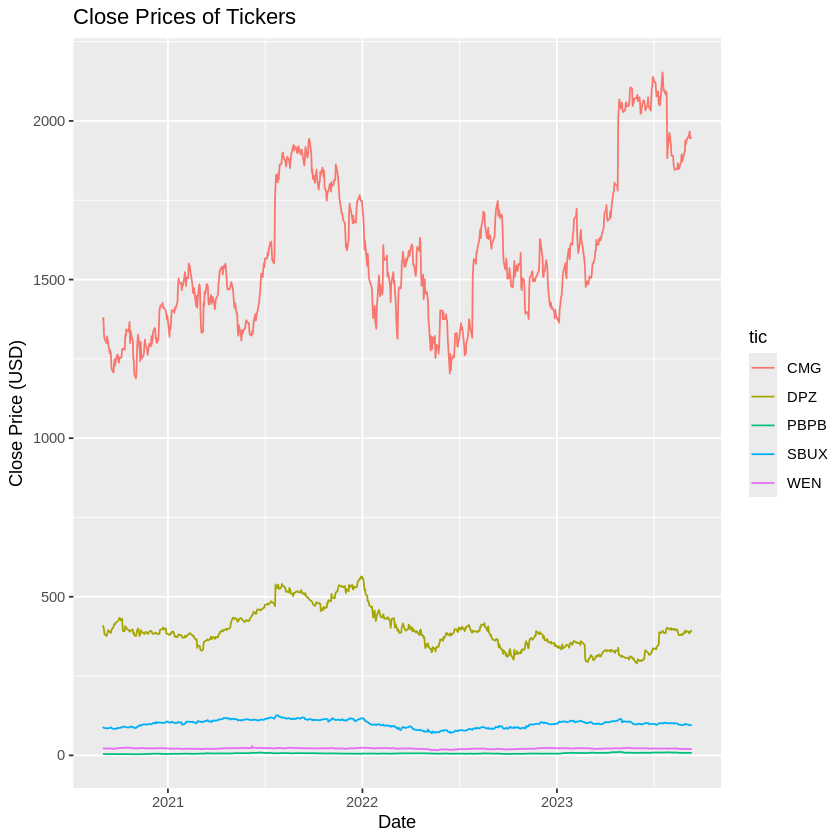

In [17]:
ggplot(df, aes(x = datadate, y = prccd, color = tic)) +
  geom_line() +
  labs(title = "Close Prices of Tickers", x = "Date", y = "Close Price (USD)")

## Figure Three

In [ ]:
# Code

## Figure Four (Bar Plot of CMG Volume)

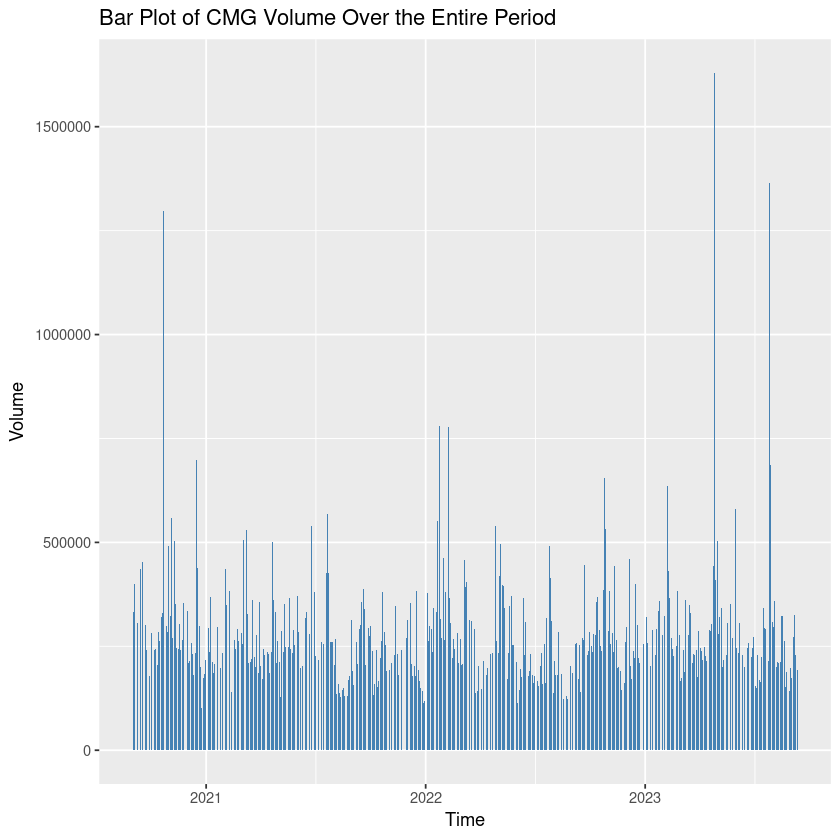

In [ ]:
ggplot(cmg_data, aes(x = datadate, y = volume)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Bar Plot of CMG Volume Over the Entire Period", x = "Time", y = "Volume")

## Figure Five

In [ ]:
# Code